# Создание и визуализация простых графов

__Автор задач: Макрушин С.В (SVMakrushin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
    * https://networkx.github.io/documentation/stable/reference/drawing.html
    * https://networkx.org/documentation/stable/reference/generators.html

### Создание и визуализация графов в `networkx`

In [1]:
import networkx as nx
import numpy as np

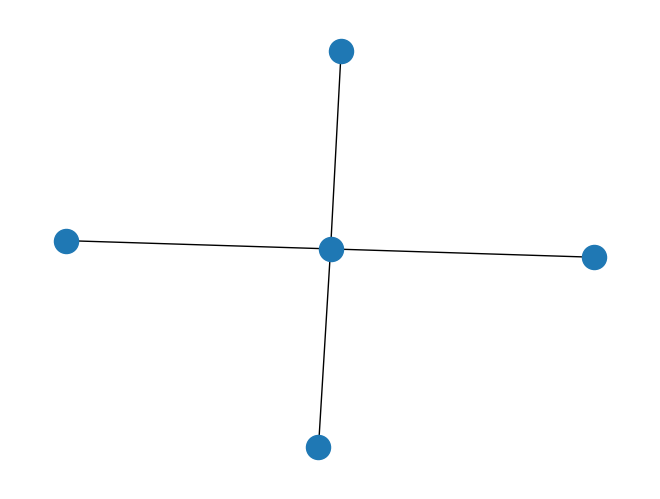

In [ ]:
G = nx.Graph()

G.add_edges_from([
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4)
])

nx.draw(G)

1.1 Создать функцию, генерирующую кольцевой граф из `n` узлов (`n` - параметр функции).

In [ ]:
def create_ring_graph(n):
  G = nx.Graph()

  for node in range(1, n):
    G.add_edge(node-1, node)

  G.add_edge(0, n-1)

  return G

1.2. Визуализировать граф, построенный с помощью функции из задания 1.1.

In [ ]:
len(G), G.number_of_nodes()

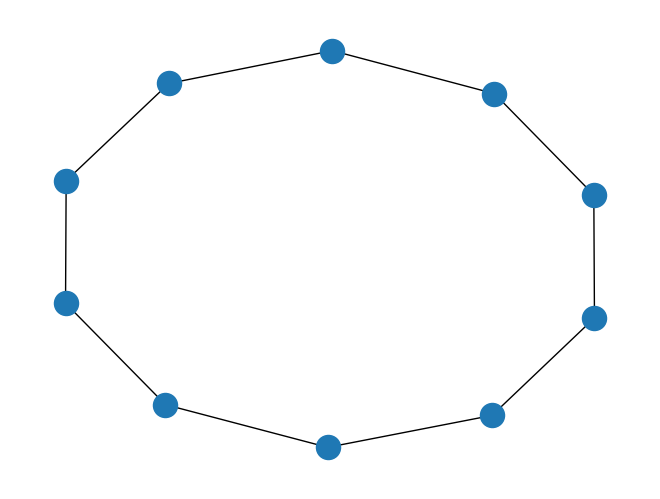

In [ ]:
ring = create_ring_graph(10)
nx.draw(ring)

1.3. Создать функцию, генерирующую граф `Y` из `3n + 1` узлов (`n` - параметр функции), где центральный узел соединен с тремя путями длины n. Визуализировать полученный граф.

![](img/3_1.png)

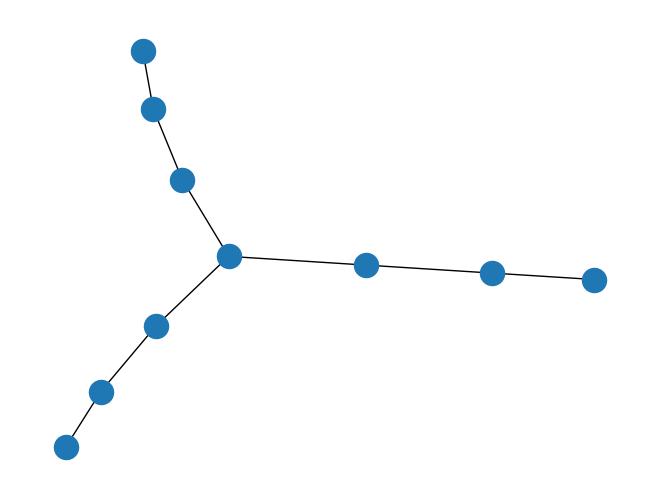

In [ ]:
def create_path_graph(n):
  G = nx.Graph()

  num_paths = 3

  start_node = 0
  G.add_node(start_node)

  for _ in range(n):
    num_nodes = len(G)
    G.add_edge(start_node, num_nodes)
    nx.add_path(G, range(num_nodes, num_nodes+n))

  return G


G = create_path_graph(3)
nx.draw(G)

In [ ]:
G.nodes[0]['inner_graph'] = nx.Graph()
G.nodes[1]['inner_graph'] = nx.Graph()

nx.get_node_attributes(G, 'inner_graph')

{0: <networkx.classes.graph.Graph at 0x7df75c08be50>,
 1: <networkx.classes.graph.Graph at 0x7df75c08ba90>}

### Построение решеток

2.1 Построить квадратную решетку 5 на 4, используя встроенную функцию `networkx`, и визуализировать ее.

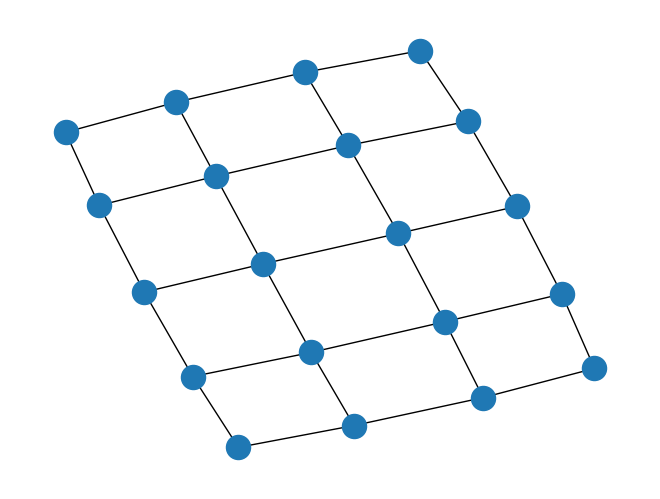

In [80]:
nx.draw(nx.grid_2d_graph(5, 4))


2.2 Реализовать собственную функцию создания квадратной решетки `n` на `m`. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

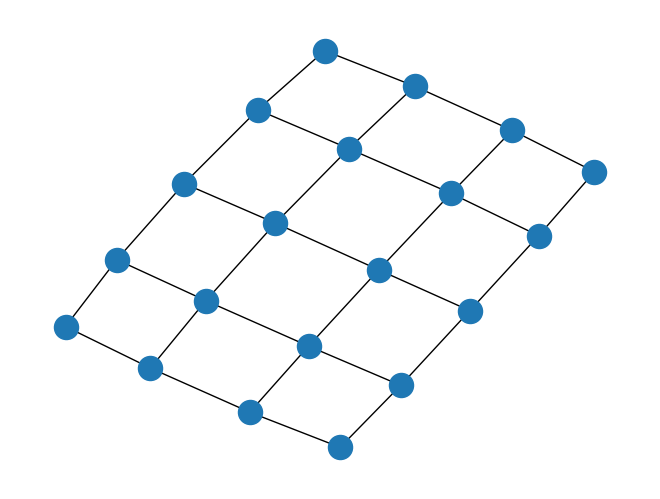

In [159]:
def create_grid(n, m):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            G.add_node((i, j))

            if i < n - 1:
                G.add_edge((i, j), (i + 1, j))
            if j < m - 1:
                G.add_edge((i, j), (i, j + 1))

    return G

grid = create_grid(5, 4)
nx.draw(grid)

2.3 Реализовать собственную функцию создания квадратной решетки `n` на `m`, которая сохраняет в графе информацию, позволяющую визуализировать сеть в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

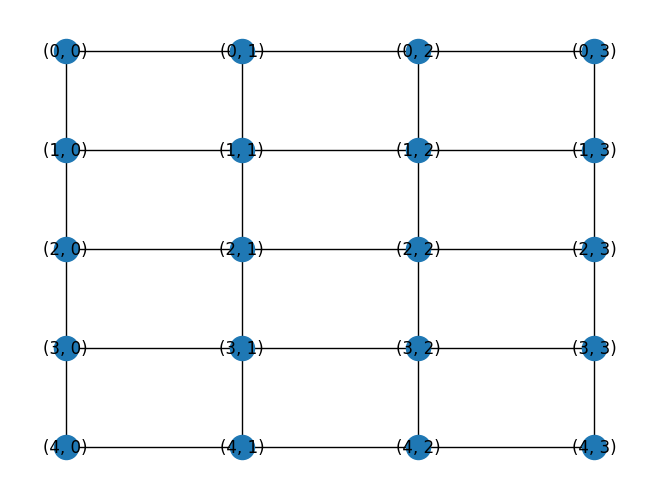

In [163]:
def create_grid(n, m):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            G.add_node((i, j))

            if i < n - 1:
                G.add_edge((i, j), (i + 1, j))
            if j < m - 1:
                G.add_edge((i, j), (i, j + 1))

    return G

grid = create_grid(5, 4)

pos = {(i, j): (j, -i) for i in range(5) for j in range(4)}

nx.draw(grid, pos=pos, with_labels=True)

2.4 Модифицировать функцию 2.3 так, чтобы решетку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

In [200]:
def create_grid(n, m):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            node = (i, j)
            G.add_node(node)
            if i > 0:
                G.add_edge((i-1, j), node)
            if j > 0:
                G.add_edge((i, j-1), node)
    return G


def closed_grid(n, m, closed: str):
    if closed in ["r", "c", "rc", None]:
        G = create_grid(n, m)
        if closed:
            closed = closed.lower()
            if "r" in closed:
                new_edges = [((n-1, i), (0, i)) for i in range(m)]
                G.add_edges_from(new_edges)
            if "c" in closed:
                new_edges = [((i, m-1), (i, 0)) for i in range(n)]
                G.add_edges_from(new_edges)

        return G

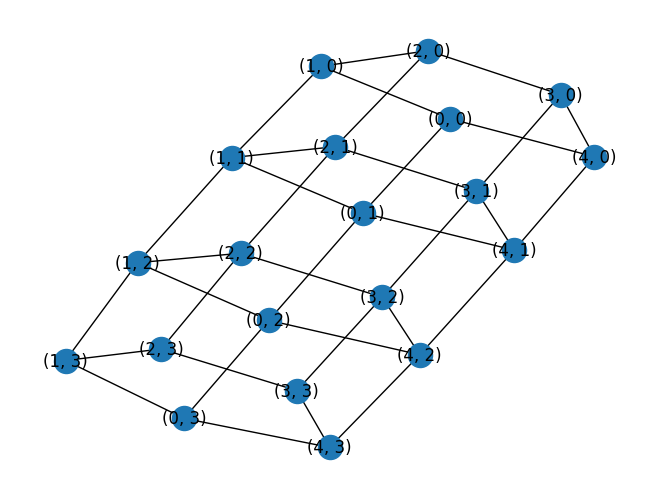

In [173]:
grid = closed_grid(5, 4, "r")
nx.draw(grid, with_labels=True)

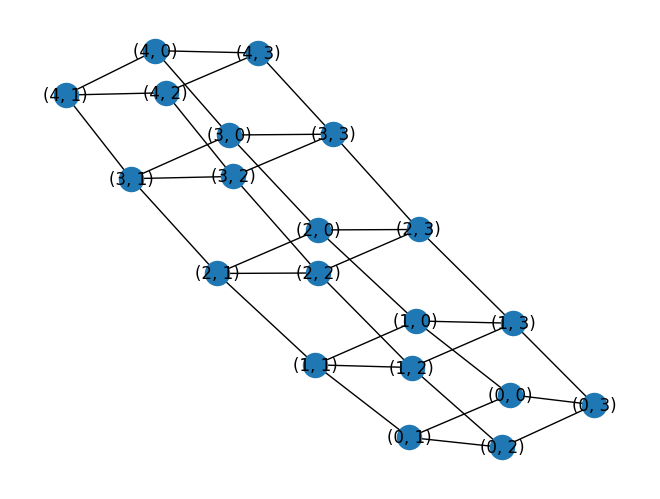

In [186]:
grid = closed_grid(5, 4, "c")
nx.draw(grid, with_labels=True)

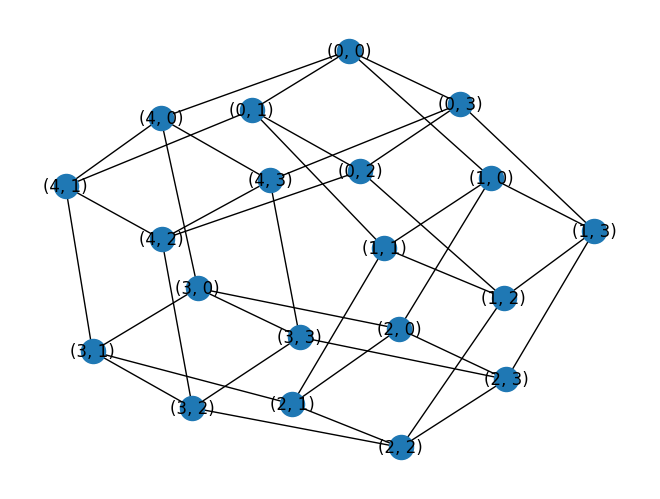

In [201]:
grid = closed_grid(5, 4, "rc")
nx.draw(grid, with_labels=True)

### (u, v) цветок

Граф «(u,v) цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длиной u и v соответственно (см.рис).

![](img/flowers.png)

3.1 Реализовать функцию построения (1, 2) цветка. Функция принимает один целочисленный параметр `n` - количество шагов построения.

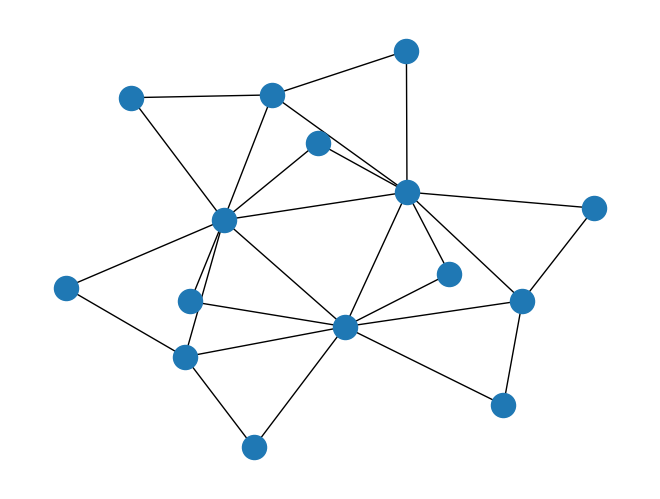

In [202]:
def draw_flower(n):
  g = nx.Graph()
  current_node = 2

  g.add_edge(0, 1)
  for _ in range(n):
    edges = list(g.edges())
    for edge in edges:
      g.add_edges_from([(edge[0], current_node), (edge[1], current_node)])
      current_node += 1

  return g


G = draw_flower(3)
nx.draw(G)

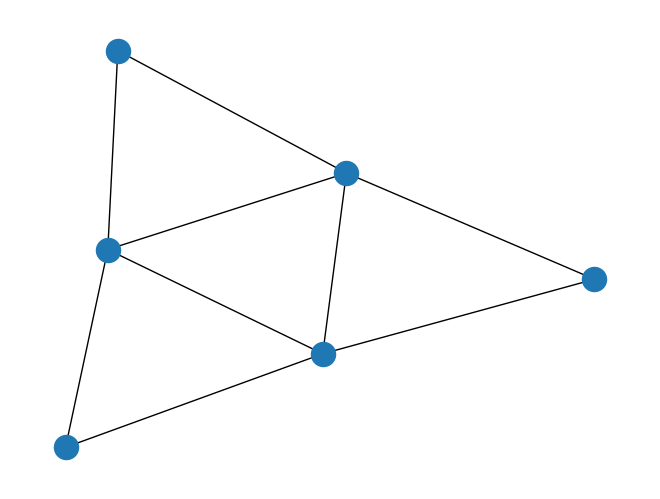

In [141]:
G = draw_flower(2)
nx.draw(G)

3.2 Для графа, построенного в задаче 3.1, посчитать количество узлов, количество связей, среднюю степень узла.

In [96]:
print("Количество узлов:", G.number_of_nodes())
print("Количество связей:", G.number_of_edges())
print("Средняя степень узла:", sum(dict(G.degree()).values()) / G.number_of_nodes())

Количество узлов: 15
Количество связей: 27
Средняя степень узла: 3.6


3.3 Визуализировать граф, построенный в задаче 3.1, с указанием идентификаторов узлов.

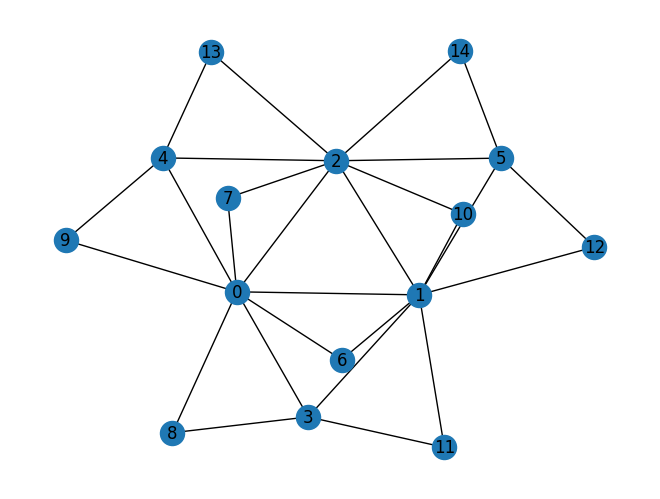

In [99]:
nx.draw(G, with_labels=True)

3.4 Для графа, построенного в задаче 3.1, посчитать степень каждого узла и сохранить информацию о ней в самом узле

In [106]:
node_degrees = dict(G.degree())
nx.set_node_attributes(G, node_degrees, 'degree')

print("узел степень")
for node in G.nodes():
    print(node, "     ", G.nodes[node]['degree'])

узел степень
0       8
1       8
2       8
3       4
4       4
5       4
6       2
7       2
8       2
9       2
10       2
11       2
12       2
13       2
14       2


3.5 Создать визуализацию графа, построенного в задаче 3.1, в которой размер узла определяется его степенью (с указанием идентификаторов узлов).

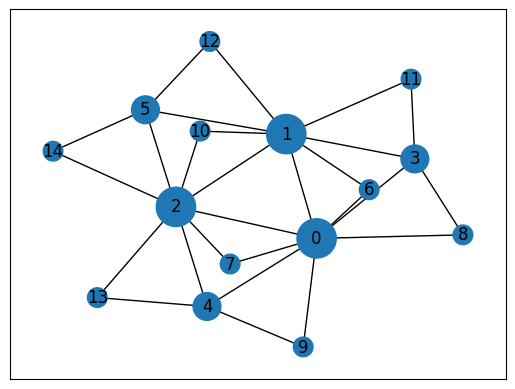

In [204]:
node_size = [d * 100 for d in node_degrees.values()]

G = draw_flower(3)
nx.draw_networkx(G, with_labels=True, node_size=node_size)

3.6 Реализовать функцию построения (u,v) цветка. Функция принимает на вход 3 параметра: `u` – длина 1го пути при замене связи; `v` – длина 2го пути при замене связи; `n` - количество шагов построения.

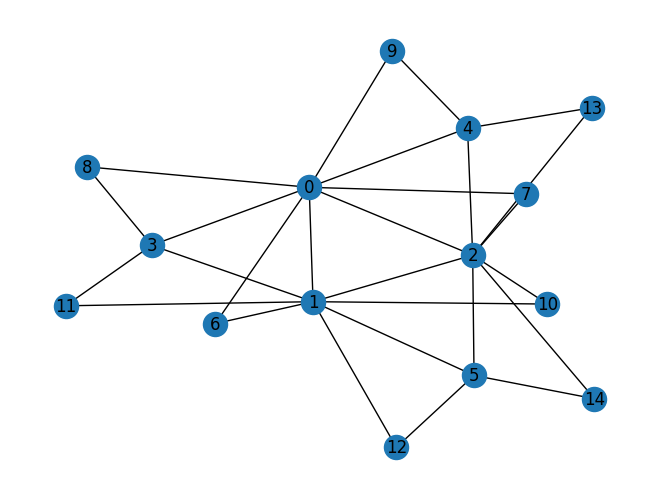

In [207]:
def uv_flower(u, v, n):
  G = nx.Graph()
  current_node = 2
  G.add_edge(0, 1)

  for _ in range(n):
    edges = list(G.edges())
    for edge in edges:
      G.add_edges_from([(edge[0],current_node, {"weight":u}),
                        (edge[1],current_node, {"weight":v})])
      current_node += 1

  return G


G  = uv_flower(1, 3, 3)
nx.draw_spring(G, with_labels = True)

In [209]:
nx.get_edge_attributes(G,'weight')

{(0, 2): 1,
 (0, 3): 1,
 (0, 4): 1,
 (0, 6): 1,
 (0, 7): 1,
 (0, 8): 1,
 (0, 9): 1,
 (1, 2): 3,
 (1, 3): 3,
 (1, 5): 1,
 (1, 6): 3,
 (1, 10): 1,
 (1, 11): 1,
 (1, 12): 1,
 (2, 4): 3,
 (2, 5): 3,
 (2, 7): 3,
 (2, 10): 3,
 (2, 13): 1,
 (2, 14): 1,
 (3, 8): 3,
 (3, 11): 3,
 (4, 9): 3,
 (4, 13): 3,
 (5, 12): 3,
 (5, 14): 3}